# 01 - Data Preprocessing & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Import Data
from ucimlrepo import fetch_ucirepo 
df = fetch_ucirepo(id=45)

x = df.data.features  # --> All Features
y = df.data.targets   # --> Target


print(x.head())
print(y.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
   num
0    0
1    2
2    1
3    0
4    0


In [2]:
# Compine all Dataframe 

heart_disease = pd.concat([x, y], axis=1)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
# Checking Missing Data

print(heart_disease.info())
heart_disease.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [4]:
# Checking Missing Data

print(heart_disease.isna().sum())
print(heart_disease.duplicated().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
0


In [5]:
# Filling Null Values In ca, thal Columns With Mode Values

heart_disease.fillna({
    'ca': heart_disease['ca'].mode()[0],
    'thal': heart_disease['thal'].mode()[0]
}, inplace=True)


# Check Null Values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
# one-hot encoding for categorical columns (cp, restecg, slope, thal, ca)

heart_disease = pd.get_dummies(heart_disease, columns=['cp', 'restecg', 'slope', 'thal', 'ca'], drop_first=True)
heart_disease.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2,...,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,63,1,145,233,1,150,0,2.3,0,False,...,False,False,True,False,True,True,False,False,False,False
1,67,1,160,286,0,108,1,1.5,2,False,...,True,False,True,True,False,False,False,False,False,True
2,67,1,120,229,0,129,1,2.6,1,False,...,True,False,True,True,False,False,True,False,True,False
3,37,1,130,250,0,187,0,3.5,0,False,...,False,False,False,False,True,False,False,False,False,False
4,41,0,130,204,0,172,0,1.4,0,True,...,False,False,True,False,False,False,False,False,False,False


In [7]:
# Standardize numerical features

scaler = StandardScaler()

num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_disease[num_cols] = scaler.fit_transform(heart_disease[num_cols])

heart_disease.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_2,...,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0,ca_1.0,ca_2.0,ca_3.0
0,0.948726,1,0.757525,-0.264900,1,0.017197,0,1.087338,0,False,...,False,False,True,False,True,True,False,False,False,False
1,1.392002,1,1.611220,0.760415,0,-1.821905,1,0.397182,2,False,...,True,False,True,True,False,False,False,False,False,True
2,1.392002,1,-0.665300,-0.342283,0,-0.902354,1,1.346147,1,False,...,True,False,True,True,False,False,True,False,True,False
3,-1.932564,1,-0.096170,0.063974,0,1.637359,0,2.122573,0,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,0,-0.096170,-0.825922,0,0.980537,0,0.310912,0,True,...,False,False,True,False,False,False,False,False,False,False


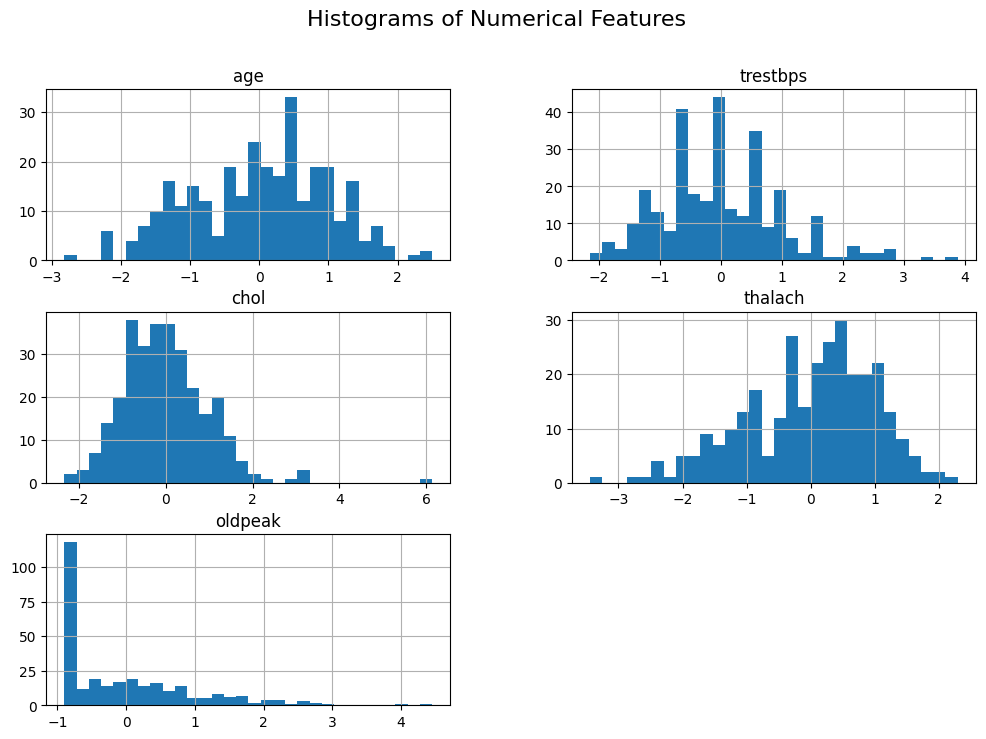

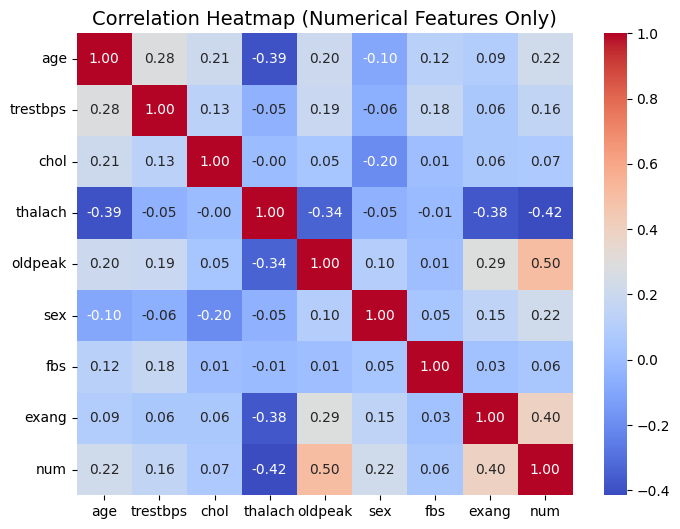

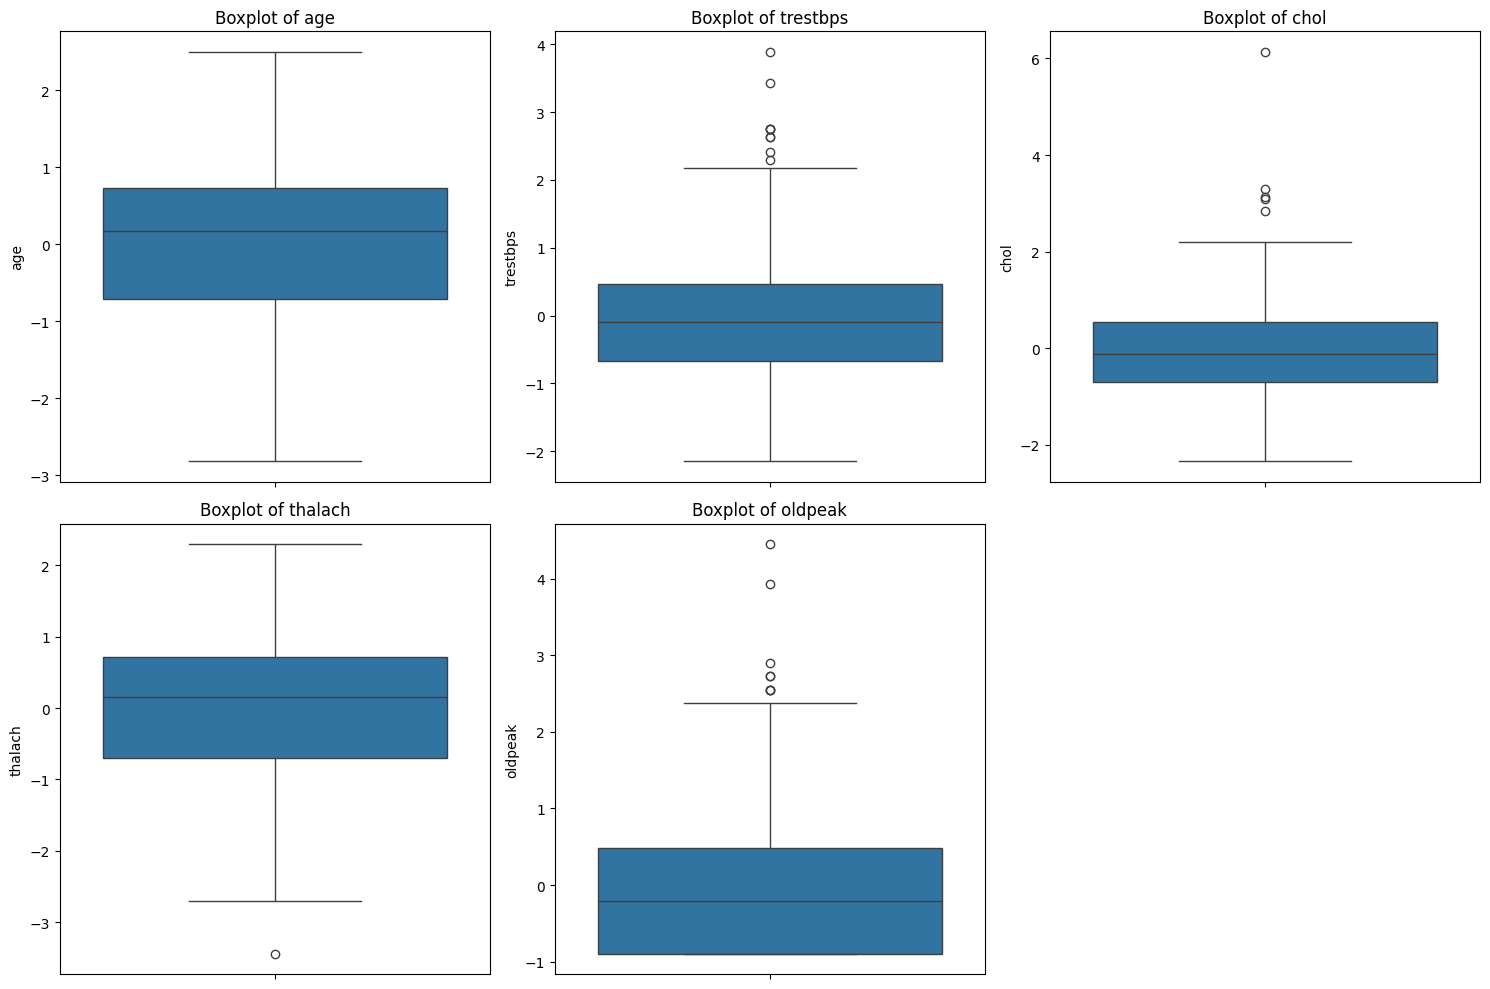

In [8]:
#  Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots

# ---------------------------
# 1) Histograms
heart_disease[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


# 2) Correlation Heatmap

num_cols_corr = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 
            'sex', 'fbs', 'exang', 'num']

corr = heart_disease[num_cols_corr].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)", fontsize=14)
plt.show()


# 3) Boxplots

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=heart_disease[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [9]:
# Saving Cleaned File 
heart_disease.to_csv(r"C:\Users\eyad0\Documents\python\Heart_Disease_Project\data\heart_disease_clean.csv", index=False)